In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import matthews_corrcoef
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv('datasets/stacking_dataset.csv', nrows=1000000)

In [4]:
y = df.pop('class')

In [6]:
lr = LogisticRegression()
kf = KFold(n_splits=5)
y_proba = []
y_true = []
oof_index = []

for i, (train_index, val_index) in enumerate(kf.split(df)):
    print(f'Fold {i}')
    X_train = df.loc[train_index]
    y_train = y.loc[train_index]
    X_test = df.loc[val_index]
    y_test = y.loc[val_index]
    y_proba.extend(lr.fit(X_train, y_train).predict_proba(X_test)[:,1])
    y_true.extend(y_test)
    oof_index.extend(val_index)

lr.coef_

Fold 0
Fold 1
Fold 2
Fold 3
Fold 4


array([[2.6464541 , 2.55562494, 2.57822081, 2.62237962]])

In [19]:
proba = 1/(1+np.exp(-(np.matmul(df, lr.coef_.transpose())+lr.intercept_)))
proba

,0
0,0.007815
1,0.007153
2,0.995375
3,0.995429
4,0.995540
...,...
999995,0.007027
999996,0.995564
999997,0.007195
999998,0.007080


In [20]:
y_proba

[0.007897186579154808,
 0.0072297646786483455,
 0.9953759108237594,
 0.9954290223926898,
 0.9955403283611142,
 0.9949143723709125,
 0.9955225246400223,
 0.9954791511556714,
 0.9955790827833502,
 0.007256743665395868,
 0.9955818767976685,
 0.9953118604768152,
 0.9955963323143131,
 0.9955385805569682,
 0.007169015448751805,
 0.9955035435923183,
 0.99558293112941,
 0.995541969407547,
 0.9955773388624511,
 0.008349637480991018,
 0.00812576526347543,
 0.9955407046743624,
 0.9827063578958889,
 0.9955725515550707,
 0.9954869756519681,
 0.9955149819835477,
 0.9952166891149735,
 0.0073583273486415276,
 0.9955061940060199,
 0.9954325812574359,
 0.9952404167748721,
 0.9955818153432388,
 0.007493791573706133,
 0.0073135784371147336,
 0.9955165654078135,
 0.9954099929581037,
 0.9953981967041218,
 0.9955417304164369,
 0.9955184596795952,
 0.9955589373941149,
 0.9953799503571344,
 0.9954905311564244,
 0.012537757792441474,
 0.9932719380551731,
 0.9953633276377118,
 0.007053494384876702,
 0.9955819446

In [48]:
dtc = DecisionTreeClassifier(random_state=42, max_depth=3)
kf = KFold(n_splits=5)
y_proba = []
y_true = []
oof_index = []
mcc_mean = []

for i, (train_index, val_index) in enumerate(kf.split(df)):
    print(f'Fold {i}')
    X_train = df.loc[train_index]
    y_train = y.loc[train_index]
    X_test = df.loc[val_index]
    y_test = y.loc[val_index]
    #y_proba.extend(lr.fit(X_train, y_train).predict_proba(X_test)[:,1])
    y_proba = dtc.fit(X_train, y_train).predict_proba(X_test)[:,1]
    y_pred = np.array(y_proba) > 0.556
    y_pred = y_pred.astype(int)
    mcc = matthews_corrcoef(y_test, y_pred)
    mcc_mean.append(mcc)
    y_true.extend(y_test)
    oof_index.extend(val_index)

print(f'MCC mean: {np.mean(mcc_mean)}')

Fold 0
Fold 1
Fold 2
Fold 3
Fold 4
MCC mean: 0.9842760010245838


[Text(0.5, 0.875, 'x[0] <= 0.472\ngini = 0.496\nsamples = 800000\nvalue = [362689.0, 437311.0]'),
 Text(0.25, 0.625, 'x[0] <= 0.15\ngini = 0.019\nsamples = 363369\nvalue = [359927.0, 3442.0]'),
 Text(0.125, 0.375, 'x[1] <= 0.035\ngini = 0.015\nsamples = 360501\nvalue = [357761, 2740]'),
 Text(0.0625, 0.125, 'gini = 0.012\nsamples = 347591\nvalue = [345504, 2087]'),
 Text(0.1875, 0.125, 'gini = 0.096\nsamples = 12910\nvalue = [12257, 653]'),
 Text(0.375, 0.375, 'x[3] <= 0.337\ngini = 0.37\nsamples = 2868\nvalue = [2166, 702]'),
 Text(0.3125, 0.125, 'gini = 0.288\nsamples = 1992\nvalue = [1645, 347]'),
 Text(0.4375, 0.125, 'gini = 0.482\nsamples = 876\nvalue = [521, 355]'),
 Text(0.75, 0.625, 'x[0] <= 0.848\ngini = 0.013\nsamples = 436631\nvalue = [2762, 433869]'),
 Text(0.625, 0.375, 'x[3] <= 0.557\ngini = 0.413\nsamples = 2610\nvalue = [761, 1849]'),
 Text(0.5625, 0.125, 'gini = 0.498\nsamples = 755\nvalue = [356, 399]'),
 Text(0.6875, 0.125, 'gini = 0.341\nsamples = 1855\nvalue = [405

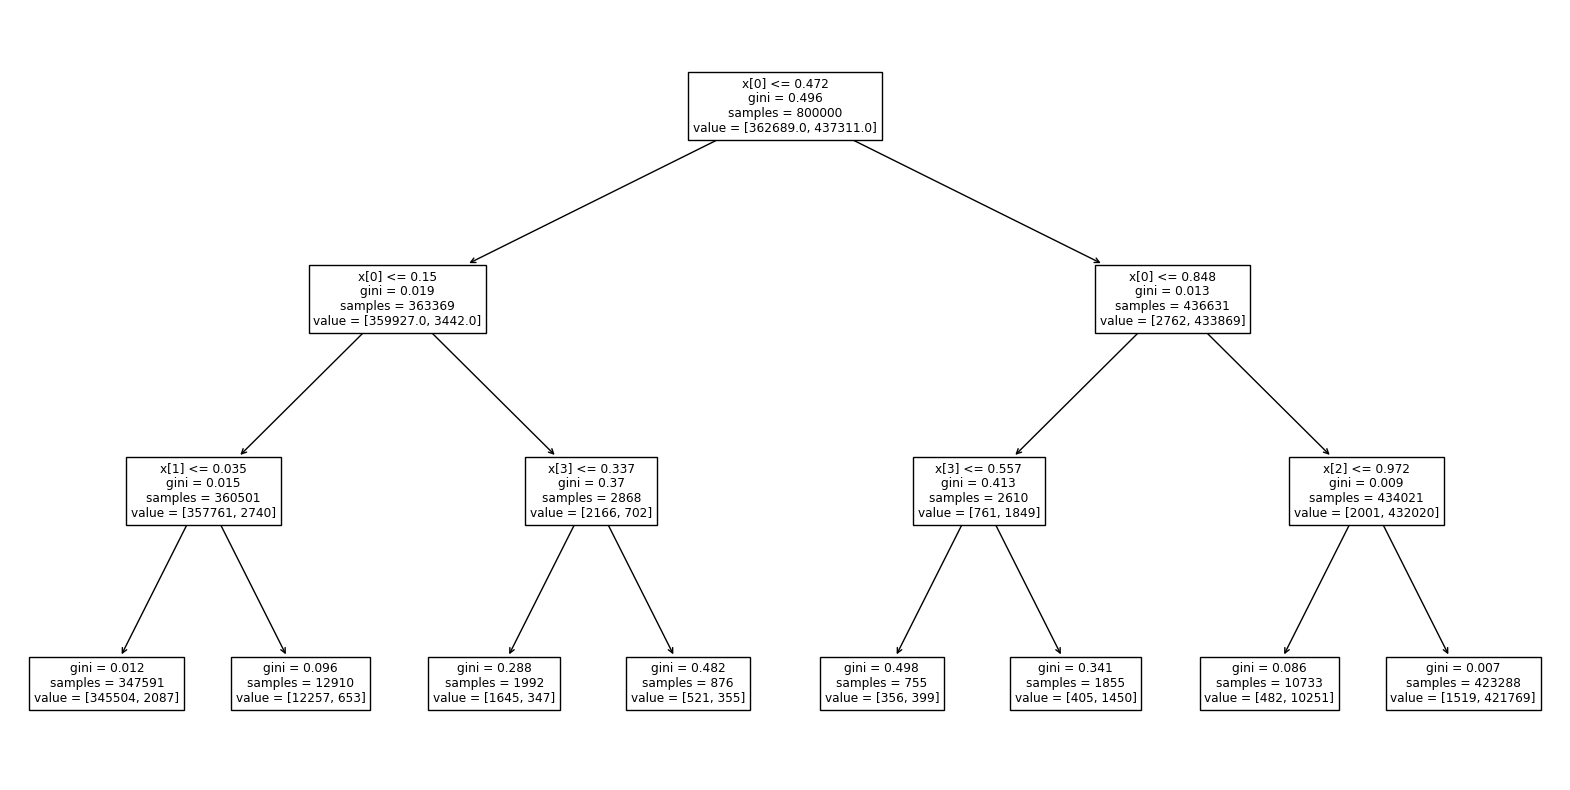

In [50]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(dtc)

In [38]:
lr.coef_

array([[2.6464541 , 2.55562494, 2.57822081, 2.62237962]])

In [52]:
size_loop = 100
step = (0.9-0.1)/size_loop
best_mcc = -1
best_param = -1
thresholds = []
scores = []
decision_threshold = 0.1

for i in range(size_loop):
    print(f'loop i: {i}')
    thresholds.append(decision_threshold)
    y_pred = (np.array(y_proba) > decision_threshold).astype(int)
    mcc = matthews_corrcoef(y_true, y_pred)
    scores.append(mcc)
    
    if(mcc > best_mcc):
        best_mcc = mcc
        best_param = decision_threshold
    
    decision_threshold+=step

print(f'best_param: {best_param}')
print(f'best mcc: {best_mcc}')

loop i: 0
loop i: 1
loop i: 2
loop i: 3
loop i: 4
loop i: 5
loop i: 6
loop i: 7
loop i: 8
loop i: 9
loop i: 10
loop i: 11
loop i: 12
loop i: 13
loop i: 14
loop i: 15
loop i: 16
loop i: 17
loop i: 18
loop i: 19
loop i: 20
loop i: 21
loop i: 22
loop i: 23
loop i: 24
loop i: 25
loop i: 26
loop i: 27
loop i: 28
loop i: 29
loop i: 30
loop i: 31
loop i: 32
loop i: 33
loop i: 34
loop i: 35
loop i: 36
loop i: 37
loop i: 38
loop i: 39
loop i: 40
loop i: 41
loop i: 42
loop i: 43
loop i: 44
loop i: 45
loop i: 46
loop i: 47
loop i: 48
loop i: 49
loop i: 50
loop i: 51
loop i: 52
loop i: 53
loop i: 54
loop i: 55
loop i: 56
loop i: 57
loop i: 58
loop i: 59
loop i: 60
loop i: 61
loop i: 62
loop i: 63
loop i: 64
loop i: 65
loop i: 66
loop i: 67
loop i: 68
loop i: 69
loop i: 70
loop i: 71
loop i: 72
loop i: 73
loop i: 74
loop i: 75
loop i: 76
loop i: 77
loop i: 78
loop i: 79
loop i: 80
loop i: 81
loop i: 82
loop i: 83
loop i: 84
loop i: 85
loop i: 86
loop i: 87
loop i: 88
loop i: 89
loop i: 90
loop i: 9

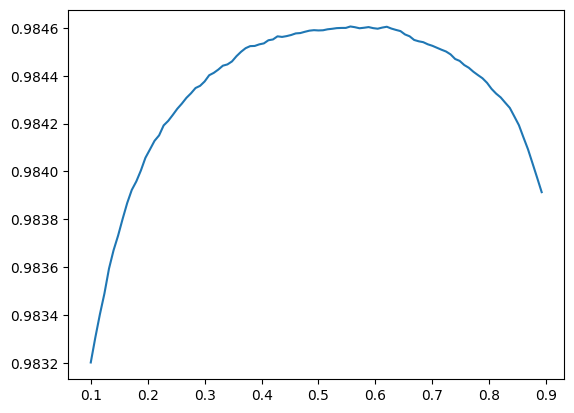

In [54]:
plt.plot(thresholds, scores)

# Explore models

In [5]:
corr = df.corr()
corr

,xgb,lgb,dart,catboost,class
xgb,1.000000,0.999038,0.999220,0.998829,0.985658
lgb,0.999038,1.000000,0.999449,0.999007,0.985219
dart,0.999220,0.999449,1.000000,0.998956,0.985491
catboost,0.998829,0.999007,0.998956,1.000000,0.985318
class,0.985658,0.985219,0.985491,0.985318,1.000000


Text(0, 0.5, 'lgb')

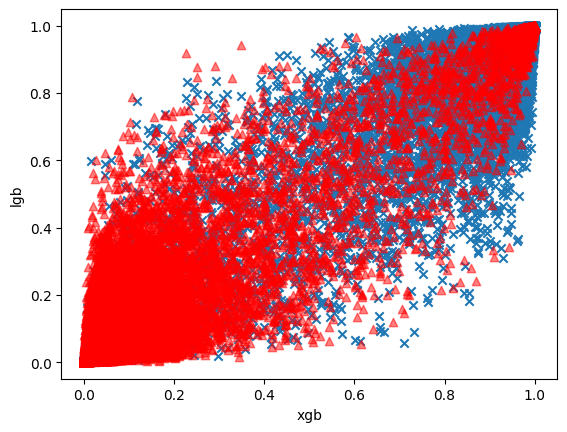

In [10]:
df_pos = df[df['class']==1]
df_neg = df[df['class']==0]
plt.scatter(df_pos['xgb'], df_pos['lgb'], marker='x')
plt.scatter(df_neg['xgb'], df_neg['lgb'], marker='^', c='red', alpha=0.5)
plt.xlabel('xgb')
plt.ylabel('lgb')

In [17]:
y_pred = (np.array(y_proba) > 0.556).astype(int)

In [22]:
error = y_true == y_pred

Text(0, 0.5, 'lgb')

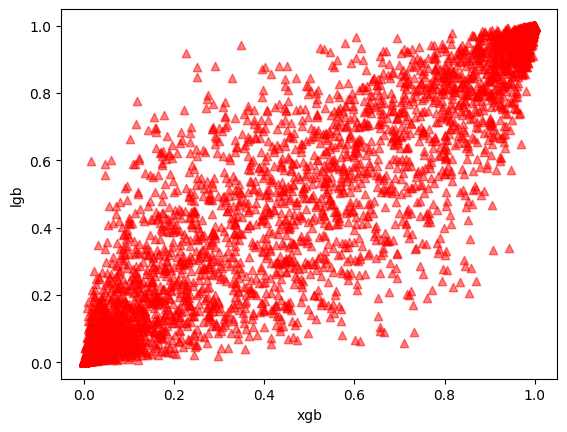

In [37]:
df_pos = df[error]
df_neg = df[error == False]
#plt.scatter(df_pos['xgb'], df_pos['lgb'], marker='x')
plt.scatter(df_neg['xgb'], df_neg['lgb'], marker='^', c='red', alpha=0.5)
plt.xlabel('xgb')
plt.ylabel('lgb')

In [36]:
df_pos

,xgb,lgb,dart,catboost
0,0.018765,0.013028,0.010030,0.009456
1,0.003596,0.005310,0.003755,0.004473
2,0.999144,0.984580,0.998546,0.996905
3,0.997641,0.996061,0.996009,0.994181
4,0.998772,0.997113,0.999041,0.998477
...,...,...,...,...
999995,0.001266,0.002526,0.003587,0.002850
999996,0.999517,0.997409,0.999615,0.998981
999997,0.004511,0.006176,0.005239,0.003482
999998,0.001024,0.004696,0.003162,0.004268


In [24]:
np.sum(error)/len(y_pred)

0.992315

In [ ]:
df_pos = df[df['class']==1]
df_neg = df[df['class']==0]
plt.scatter(df_pos['xgb'], df_pos['lgb'], marker='x')
plt.scatter(df_neg['xgb'], df_neg['lgb'], marker='^', c='red', alpha=0.5)
plt.xlabel('xgb')
plt.ylabel('lgb')